ref: 

https://keras.io/ko/

https://www.tensorflow.org/guide/keras?hl=ko

keras는 상위 수준 API입니다. 또한 신속한 프로토타입 제작, 최첨단 연구 및 프로덕션에 사용되며 다음과 같은 세 가지 주요 이점이 있습니다.

1.사용자 친화적
일반적인 사용 사례에 맞춰 최적화된 Keras의 인터페이스는 간단하고 일관성이 있습니다. Keras는 사용자 오류에 대해 명확하고 실행 가능한 피드백을 제공합니다.

2.모듈식 및 구성 가능
Keras 모델은 거의 제한 없이 구성 가능한 빌딩 블록을 함께 연결하는 방식으로 만들어집니다.

3.쉽게 확장 가능
연구를 위한 새로운 아이디어를 표현하는 맞춤 빌딩 블록을 작성할 수 있습니다. 새로운 레이어, 측정항목, 손실 함수를 만들고 최첨단 모델을 개발합니다.


이 노트북을 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/master/ML_day8_2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

# 필요한 package import

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt


# tensorflow 2 및 keras import

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras

print('tf version:', tf.__version__)
print('keras version:', keras.__version__)


tf version: 2.4.1
keras version: 2.4.0


In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# Data Load

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

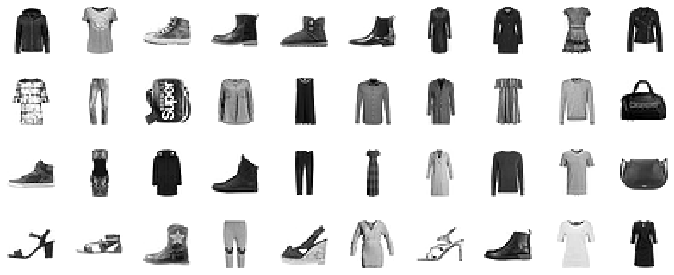

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

# Keras로 딥러닝 모델 만들기 

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


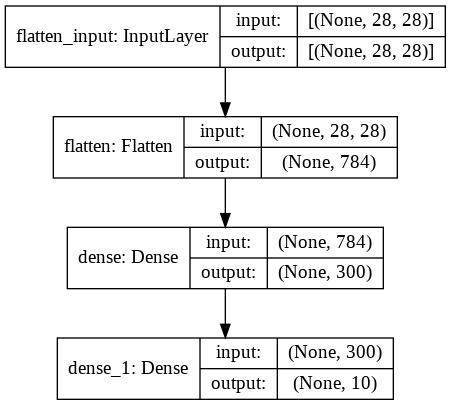

In [14]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.layers

In [16]:
model.layers[1]

In [17]:
model.layers[1].name

'dense'

In [18]:
model.get_layer(model.layers[1].name)

# 모델 학습 시키기

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_valid, y_valid))

Epoch 1/4
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0007 - accuracy: 0.6849 - val_loss: 0.5445 - val_accuracy: 0.8206
Epoch 2/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.8256 - val_loss: 0.4747 - val_accuracy: 0.8410
Epoch 3/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4708 - accuracy: 0.8400 - val_loss: 0.4486 - val_accuracy: 0.8502
Epoch 4/4
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8485 - val_loss: 0.4239 - val_accuracy: 0.8594


In [21]:
weights, biases = model.layers[1].get_weights()

In [22]:
weights

array([[-0.01817087, -0.01724812, -0.03726199, ...,  0.03568162,
        -0.03568704, -0.05985387],
       [-0.01853926,  0.00346646, -0.01597168, ...,  0.01626216,
        -0.0104976 , -0.05503768],
       [ 0.04323293,  0.04444256, -0.03494655, ..., -0.06890088,
         0.0186351 , -0.03803548],
       ...,
       [-0.02060207,  0.0362423 , -0.00524973, ...,  0.0337064 ,
         0.06634714, -0.01708877],
       [-0.05491382, -0.02219271,  0.06932054, ..., -0.04834523,
        -0.05694902, -0.04857842],
       [-0.0453198 , -0.00246813,  0.01825601, ...,  0.04227031,
        -0.06496127, -0.07432879]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [25]:
biases.shape

(300,)

In [30]:
history.params

{'epochs': 4, 'steps': 1719, 'verbose': 1}

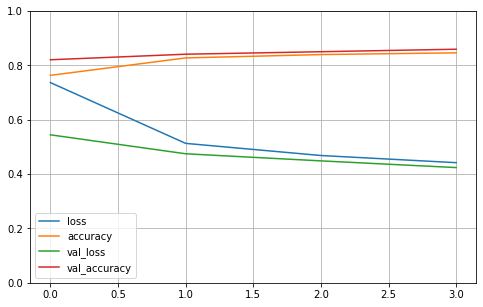

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 모델 평가하기

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.8392


[0.45874300599098206, 0.8392000198364258]

# Saving and Restoring

In [36]:
model.save("my_keras_model.h5")

In [37]:
model = keras.models.load_model("my_keras_model.h5")

In [38]:
model.save_weights("my_keras_weights.ckpt")

In [39]:
model.load_weights("my_keras_weights.ckpt")

# Sequential VS Functional

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

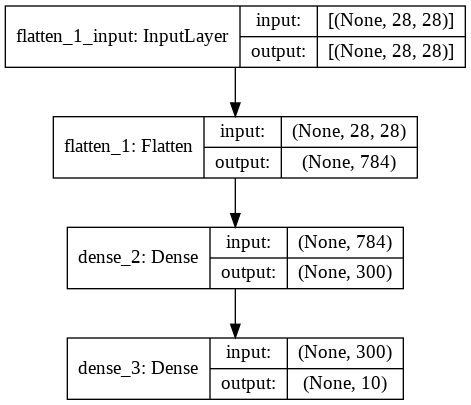

In [41]:
keras.utils.plot_model(model, show_shapes=True)

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
flatten_ = keras.layers.Flatten(input_shape=[28, 28])(input_)
hidden1 = keras.layers.Dense(300, activation="relu")(flatten_)
output = keras.layers.Dense(10, activation="softmax")(hidden1)
model = keras.models.Model(inputs=[input_], outputs=[output])

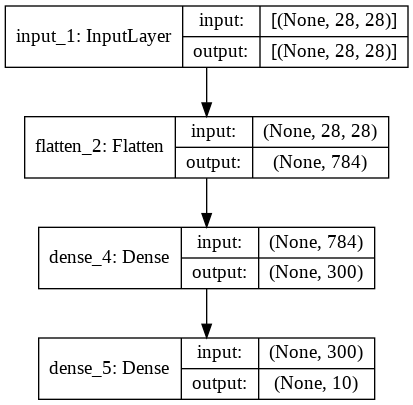

In [43]:
keras.utils.plot_model(model, show_shapes=True)

# layers

In [67]:
# 내장된 layer
#(ex)dense: output = activation(dot(input, kernel) + bias)
# https://keras.io/ko/layers/core/

[name for name in dir(keras.layers) if not name.startswith("_")]

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'Global

# Initializers

In [44]:
# 내장된 initializer

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [45]:
# initializer 세팅 방법

keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# activation Funtions

In [46]:
# 내장된 activation Funtions

[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [47]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [48]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(10, activation="softmax")
])

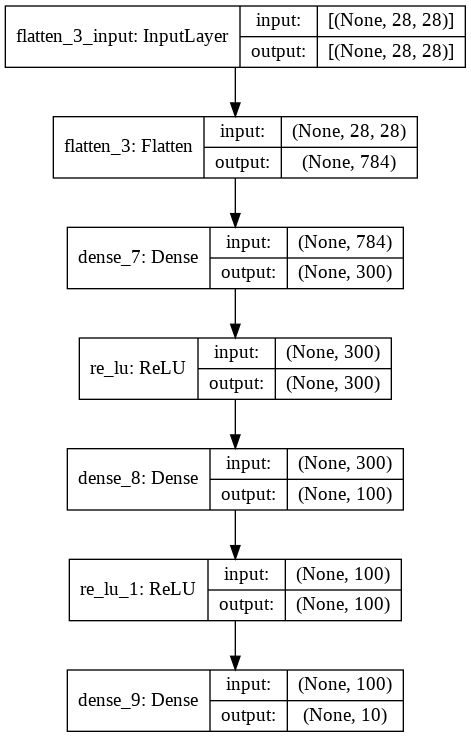

In [49]:
keras.utils.plot_model(model, show_shapes=True)

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.6975 - accuracy: 0.4971 - val_loss: 0.9259 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8709 - accuracy: 0.7245 - val_loss: 0.7308 - val_accuracy: 0.7626
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7213 - accuracy: 0.7620 - val_loss: 0.6566 - val_accuracy: 0.7876
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6449 - accuracy: 0.7880 - val_loss: 0.6005 - val_accuracy: 0.8042
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6079 - accuracy: 0.8002 - val_loss: 0.5658 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5694 - accuracy: 0.8119 - val_loss: 0.5407 - val_accuracy: 0.8232
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5428 - accuracy: 0.8195 - val_loss: 0.5197 - val_accuracy:

# Batch Normalization

In [52]:
keras.layers.BatchNormalization()

# dense - activation function - batch norm

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

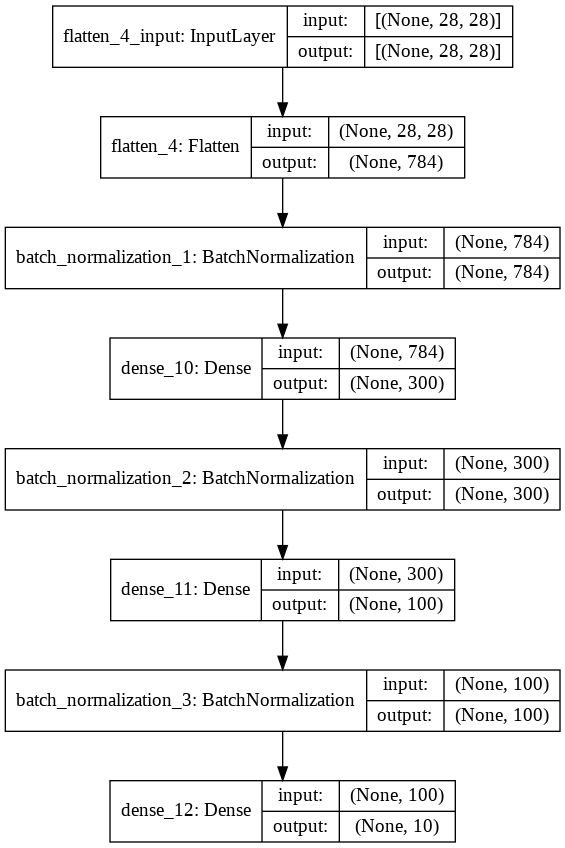

In [54]:
keras.utils.plot_model(model, show_shapes=True)

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [56]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.1207 - accuracy: 0.6292 - val_loss: 0.5539 - val_accuracy: 0.8160
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5954 - accuracy: 0.7947 - val_loss: 0.4792 - val_accuracy: 0.8380
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5296 - accuracy: 0.8170 - val_loss: 0.4424 - val_accuracy: 0.8490
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4855 - accuracy: 0.8302 - val_loss: 0.4212 - val_accuracy: 0.8570
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4683 - accuracy: 0.8353 - val_loss: 0.4051 - val_accuracy: 0.8616
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4399 - accuracy: 0.8437 - val_loss: 0.3931 - val_accuracy: 0.8632
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4264 - accuracy: 0.8504 - val_loss: 0.3829 - val_acc

# dense - batch norm - activation function

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

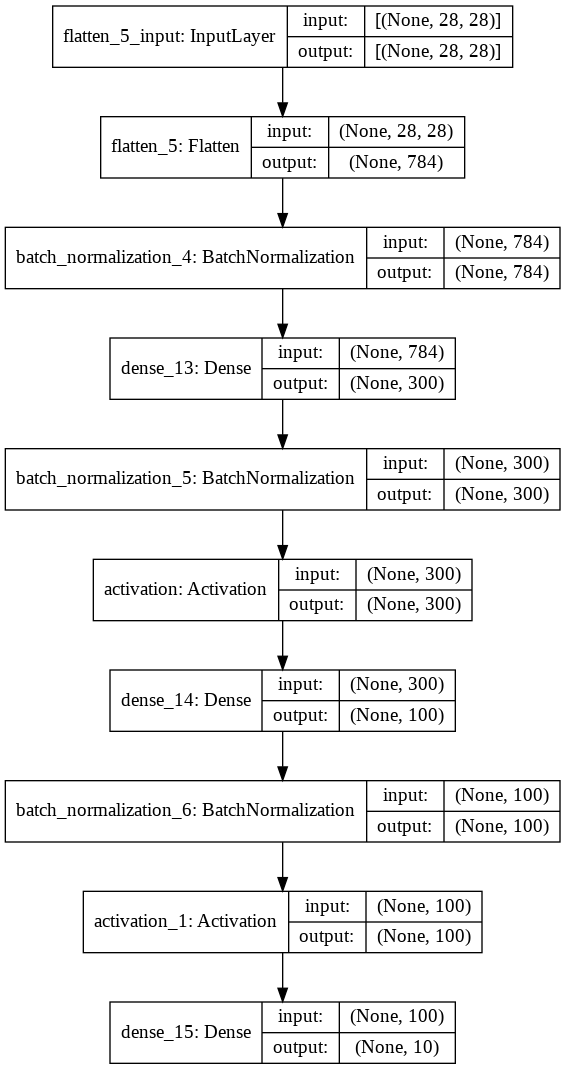

In [58]:
keras.utils.plot_model(model, show_shapes=True)

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [60]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.4003 - accuracy: 0.5431 - val_loss: 0.6680 - val_accuracy: 0.7886
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7095 - accuracy: 0.7719 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6134 - accuracy: 0.7976 - val_loss: 0.4996 - val_accuracy: 0.8350
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5561 - accuracy: 0.8140 - val_loss: 0.4655 - val_accuracy: 0.8460
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5289 - accuracy: 0.8219 - val_loss: 0.4420 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4972 - accuracy: 0.8286 - val_loss: 0.4238 - val_accuracy: 0.8538
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4779 - accuracy: 0.8357 - val_loss: 0.4103 - val_ac

# 성능 비교

In [61]:
# 그냥 relu: 0.8380
# relu + dense - activation function - batch norm : 0.8690
# relu + dense - batch norm - activation function : 0.8820

# optimizers

In [62]:
# Momentum optimization

keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [63]:
# Nesterov Accelerated Gradient

keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [64]:
# AdaGrad

keras.optimizers.Adagrad(lr=0.001)

In [65]:
# RMSProp

keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [66]:
# Adam Optimization

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Avoiding Overfitting Through Regularization

# ℓ1  and  ℓ2  regularization

In [68]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

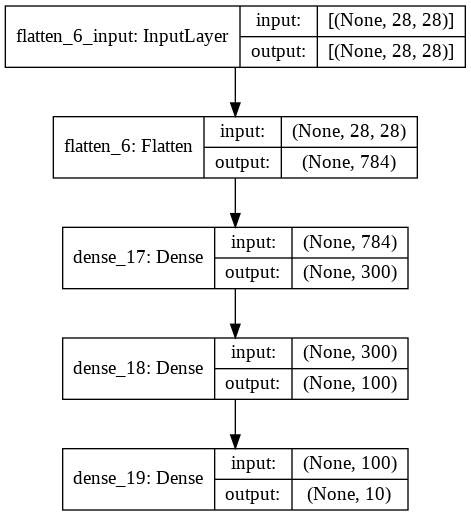

In [70]:
keras.utils.plot_model(model, show_shapes=True)

In [71]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [72]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 3.0365 - accuracy: 0.7497 - val_loss: 1.0228 - val_accuracy: 0.7628
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.9223 - accuracy: 0.7891 - val_loss: 0.8523 - val_accuracy: 0.8176


# Dropout

In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

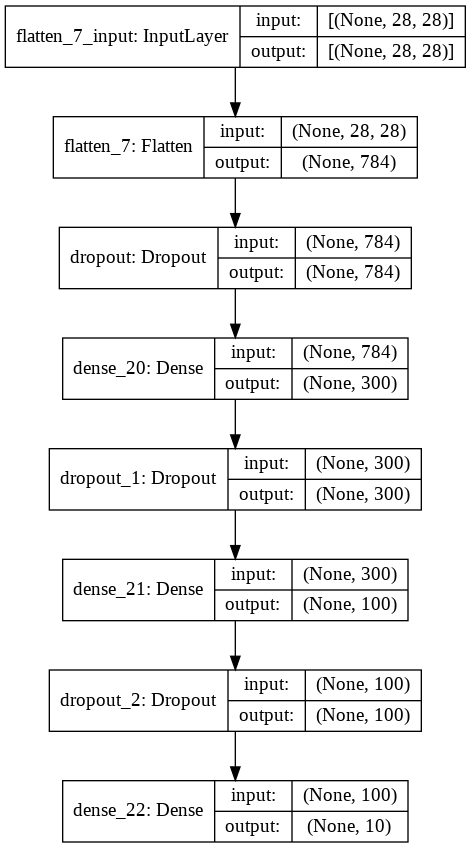

In [74]:
keras.utils.plot_model(model, show_shapes=True)

In [75]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7064 - accuracy: 0.7419 - val_loss: 0.4190 - val_accuracy: 0.8476
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4636 - accuracy: 0.8284 - val_loss: 0.3604 - val_accuracy: 0.8662


In [79]:
res = model.evaluate(X_test, y_test, batch_size=32)
print(res)

313/313 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8549
[0.3969297707080841, 0.8549000024795532]
